In [1]:
from DataGenerator import * 
from network import LocalNet
from BrainNet import BrainNet
from LocalNetBase import Options, UpdateScheme
import matplotlib.pyplot as plt
from train import train_local_rule, train_vanilla, train_given_rule
import numpy as np
from train import evaluate


%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=4)

In [2]:
image_size = 28 # width and length
labels = 10 
image_pixels = image_size * image_size
data_path = "./mnist/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 

In [3]:
len(train_data)

60000

In [4]:
dim = image_size * image_size
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [5]:
data = 60000
X = train_imgs[0:data]
y = train_labels[0:data]
X_test = test_imgs
y_test = test_labels

y = y.flatten().astype(int)
y_test = y_test.flatten().astype(int)

for i in range(10):
    print(sum(y==i))

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949


In [6]:
options = Options(
                 gd_output = False,
                 gd_input = False,
                 use_graph_rule = False, 
                 use_input_rule = False,
                 use_output_rule = True,
                 gd_output_rule = False,
                 gd_graph_rule = False,
                 additive_rule = True)

scheme = UpdateScheme(
            cross_entropy_loss = True, 
            mse_loss = False, 
            update_misclassified = True,
            update_all_edges = False
        )

In [8]:
local_net = LocalNet(dim, labels, num_v = 1000, p = .5, cap = 500, rounds = 1, options = options, update_scheme = scheme)
losses = []

local_net.input_weights = torch.ones_like(local_net.input_weights).double()
local_net.set_output_rule(torch.tensor([[-1, 1], [1, -1], [-1, 1], [1, -1]]))

train_acc_learned, test_acc_learned = train_given_rule(X, y, local_net, decay = .96, epochs = 20, verbose = True, X_test = X_test, y_test=y_test)

Epoch #: 0
Train on 0  examples.
Acc of class 0 :1.0000
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.0000
Train Accuracy: 0.0987
Acc of class 0 :1.0000
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.0000
Test Accuracy: 0.0980
Train on 5000  examples.
Acc of class 0 :1.0000
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.0000
Train Accuracy: 0.0987
Acc of class 0 :1.0000
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000


Acc of class 0 :1.0000
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.0000
Test Accuracy: 0.0980
Train on 15000  examples.
Acc of class 0 :1.0000
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.0000
Train Accuracy: 0.0987
Acc of class 0 :1.0000
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.0000
Test Accuracy: 0.0980


KeyboardInterrupt: 

In [12]:
print(max(train_acc_learned))
print(max(test_acc_learned))

NameError: name 'train_acc_learned' is not defined

In [13]:
t1 = train_acc_learned[1:150]
t2 = test_acc_learned[1:150]
plt.plot(5000 * np.arange(len(t1)-10) + 10000, [np.mean(t1[i:i+10]) for i in range(len(t1)-10)], label="Train")
plt.plot(5000 * np.arange(len(t2)-10) + 10000, [np.mean(t2[i:i+10]) for i in range(len(t2)-10)], label="Test")
plt.xlabel("# Training examples (starting at 5000)")
plt.ylabel("Accuracy")
plt.title("MNIST Brain Net (T=1) Decaying Step Size")
plt.legend()
plt.savefig("MNIST_full_data_96_acc_n_1000_decaying_step.png")

NameError: name 'train_acc_learned' is not defined

In [ ]:
print(local_net.step_sz)

0.01


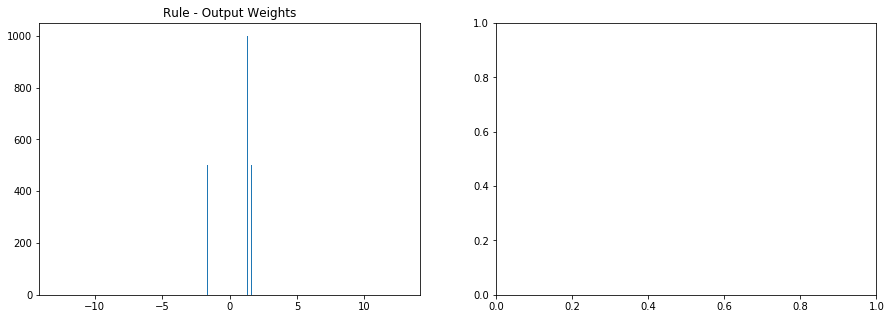

In [14]:
# Distribution of weights 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.hist(local_net.output_weights.flatten(), bins = 1000)
ax1.set_title("Rule - Output Weights")

# ax2.hist(gd_net.output_weights.detach().numpy().flatten(), bins = 1000)
# ax2.set_title("GD - Output Weights")
# plt.savefig("Histogram - rule training")
plt.show()

In [16]:
# Train Net with GD
gd_net = BrainNet(dim, labels, num_v = 1000, p = .5, cap = 500, rounds = 0, gd_output = True)
gd_net.input_layer = local_net.input_layer 
gd_net.input_weights = local_net.input_weights
train_vanilla(X, y, gd_net, epochs = 100, batch = 100, lr = 1e-3)

Evaluating
Acc of class 0 :0.7147
Acc of class 1 :0.7128
Acc of class 2 :0.4822
Acc of class 3 :0.3508
Acc of class 4 :0.4281
Acc of class 5 :0.3343
Acc of class 6 :0.6088
Acc of class 7 :0.6129
Acc of class 8 :0.4979
Acc of class 9 :0.4443
epoch  1 Loss: 731.4810 Accuracy: 0.5229
Finished Training


[731.4810106019102]

In [ ]:
input_label = 1
target_label = 0
image_num = 0 # (image_num)^th image in the list that appears with label 'input_label'

# don't change these
index = 0 
c = 0
for i in range(data): 
    if y[i] == input_label: 
        c += 1
        if image_num == c:
            index = i
            break
        
initial = X[index]

print("Original Label      ", input_label)
print("Original Prediction:", torch.argmax(local_net.forward_pass(torch.tensor([initial]))).item())
print("Target Label        ", target_label)

from AdversarialExamples import adversarial_example

## Original / Rule Advasarial / GD Adversarial 
rule_adversarial = adversarial_example(torch.tensor([initial]).double(), torch.tensor([target_label]).long(), local_net.forward_pass)
gd_adversarial = adversarial_example(torch.tensor([initial]).double(), torch.tensor([target_label]).long(), gd_net.forward_pass)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))

original_image = initial.reshape((28,28))
ax1.imshow(1-original_image, cmap='gray', vmin=0, vmax=1)
ax1.axis('off')
ax1.set_title("Original")

img = rule_adversarial.detach().numpy().reshape((28,28))
ax2.imshow(1-img, cmap='gray', vmin=0, vmax=1)
ax2.axis('off')
ax2.set_title("Adversarial For Rule Net")

img = gd_adversarial.detach().numpy().reshape((28,28))
ax3.imshow(1-img, cmap='gray', vmin=0, vmax=1)
ax3.axis('off')
ax3.set_title("Adversarial For GD Net")

plt.show()

print("Distance from original")
print("To Rule Net Adversarial", np.linalg.norm(rule_adversarial.detach().numpy() - original_image.flatten()))
print("To GD Net Adversarial  ", np.linalg.norm(gd_adversarial.detach().numpy() - original_image.flatten()))

Original Label       1
Original Prediction: 9
Target Label         0


In [ ]:
## Entry (i,j) of matrix denotes average distance between original and 
## adversarial image given an original image with label i and target 
## of incorrectly labelling as j.
### Only uses examples which are initially predicted correctly

# This cell is for the net trained with a *rule*

dist = np.zeros((10, 10))
cnt = np.zeros((10, 10))
c = 0
for _x, _y in zip(X, y): 
    prediction = torch.argmax(local_net.forward_pass(torch.tensor([_x]).double())).item()
    if prediction != _y : continue 
    print(c)
    c += 1
    if c == 1000: break 
    for i in range(10): 
      if i == _y: continue 
      final = adversarial_example(torch.tensor([_x]).double(), torch.tensor([i]).long(), local_net.forward_pass)
      dist[_y][i] += np.linalg.norm(final.detach().numpy() - _x)
      cnt[_y][i] += 1

In [ ]:
# BRAIN NET 
print(dist / cnt)

[[   nan 4.3036 3.2477 3.5496 3.6716 3.9076 3.7798 3.2153 3.9242 4.0978]
 [2.9324    nan 2.5584 2.6141 2.4728 2.157  2.8401 2.1941 2.8192 2.5238]
 [3.1814 5.829     nan 5.3067 2.941  3.0644 3.5074 3.1032 3.6461 3.5598]
 [2.2091 3.3291 2.4211    nan 2.4762 1.8944 3.8523 2.3516 2.3504 2.6818]
 [2.7141 3.5266 3.1825 3.1607    nan 2.3399 3.2641 2.4749 3.1212 2.6029]
 [3.0668 3.3671 2.7559 3.1453 2.5844    nan 2.7161 2.6993 3.1519 3.0661]
 [2.8032 4.5101 2.4459 3.044  3.145  2.749     nan 3.0398 2.9833 3.0956]
 [2.6483 3.5383 3.6278 3.6236 3.0109 2.7692 3.6626    nan 2.7612 3.9348]
 [2.0901 2.2108 1.8041 1.9799 1.8602 1.4258 2.3519 1.9798    nan 2.0997]
 [2.2845 2.9895 2.7733 2.1868 1.6665 1.7096 2.5372 1.6702 2.31      nan]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
## Entry (i,j) of matrix denotes average distance between original and 
## adversarial image given an original image with label i and target 
## of incorrectly labelling as j.
### Only uses examples which are initially predicted correctly

# This cell is for the net trained with *GD*

dist_gd = np.zeros((10, 10))
cnt_gd = np.zeros((10, 10))
c = 0
for _x, _y in zip(X, y): 
    prediction = torch.argmax(gd_net.forward_pass(torch.tensor([_x]).double())).item()
    if prediction != _y : continue 
    print(c)
    c += 1
    if c == 1000: break 
    for i in range(10): 
      if i == _y: continue 
      final = adversarial_example(torch.tensor([_x]).double(), torch.tensor([i]).long(), gd_net.forward_pass)
      dist_gd[_y][i] += np.linalg.norm(final.detach().numpy() - _x)
      cnt_gd[_y][i] += 1

In [ ]:
# GD NET 
print(dist_gd / cnt_gd)

[[   nan 4.1997 2.1194 2.209  3.8363 1.7579 2.167  2.9692 2.2788 3.9838]
 [2.8477    nan 0.9763 1.022  2.1902 1.5335 1.8226 1.0837 0.9125 1.4458]
 [2.842  3.6837    nan 1.7819 3.6504 2.8917 1.7057 3.3463 1.9472 3.4332]
 [2.5515 2.5379 1.73      nan 2.8838 1.4506 3.9166 2.2613 1.4828 2.3556]
 [2.5248 3.093  1.8978 2.5504    nan 1.8244 1.2795 1.3411 1.5894 1.2177]
 [1.461  2.7471 2.0995 1.3323 2.0136    nan 2.098  1.9482 1.3422 1.8807]
 [2.3852 3.4558 1.4126 2.5065 2.2194 2.1019    nan 2.9214 1.8163 2.104 ]
 [2.4509 3.0542 2.7269 1.9061 2.1382 2.3714 3.2698    nan 1.7991 1.2074]
 [2.8093 2.5325 1.6151 1.4135 2.45   1.7137 2.5334 1.9904    nan 1.8814]
 [2.5486 2.9526 1.9784 1.5137 0.9892 1.5577 2.1608 0.9196 1.2389    nan]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
for i in range(10): 
  cnt[i][i] = 1
  cnt_gd[i][i] = 1
rule_res = np.nan_to_num(dist) / cnt 
gd_res = np.nan_to_num(dist_gd) / cnt_gd

In [ ]:
 np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(rule_res - gd_res)

[[0.000 0.104 1.128 1.341 -0.165 2.150 1.613 0.246 1.645 0.114]
 [0.085 0.000 1.582 1.592 0.283 0.623 1.018 1.110 1.907 1.078]
 [0.339 2.145 0.000 3.525 -0.709 0.173 1.802 -0.243 1.699 0.127]
 [-0.342 0.791 0.691 0.000 -0.408 0.444 -0.064 0.090 0.868 0.326]
 [0.189 0.434 1.285 0.610 0.000 0.515 1.985 1.134 1.532 1.385]
 [1.606 0.620 0.656 1.813 0.571 0.000 0.618 0.751 1.810 1.185]
 [0.418 1.054 1.033 0.537 0.926 0.647 0.000 0.118 1.167 0.992]
 [0.197 0.484 0.901 1.718 0.873 0.398 0.393 0.000 0.962 2.727]
 [-0.719 -0.322 0.189 0.566 -0.590 -0.288 -0.181 -0.011 0.000 0.218]
 [-0.264 0.037 0.795 0.673 0.677 0.152 0.376 0.751 1.071 0.000]]


In [ ]:
# means
print(np.nan_to_num(rule_res).mean())
print(np.nan_to_num(gd_res).mean())

2.6277634741060685
1.9669432183894444
